IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

LOAD DATASET

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning project/AutoInsuranceClaims2024.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,...,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Total Claim Amount,Vehicle Class,Vehicle Class Index,Vehicle Size,Vehicle Size Index
0,QC35222,California,3622.69,No,Basic,0,Bachelor,2,1/1/2024,Employed,...,Corporate L2,4,3,Web,0,380.90,Four-Door Car,1,Medsize,1
1,AE98193,Washington,10610.21,No,Basic,0,High School or Below,0,1/1/2024,Unemployed,...,Personal L1,0,1,Branch,1,1098.36,SUV,4,Medsize,1
2,TM23514,Oregon,13868.02,No,Extended,1,College,1,1/1/2024,Employed,...,Personal L3,2,3,Web,0,783.64,SUV,4,Medsize,1
3,WB38524,California,4008.95,No,Basic,0,High School or Below,0,1/1/2024,Employed,...,Personal L3,2,2,Branch,1,479.52,Two-Door Car,0,Small,0
4,QZ42725,Washington,3119.69,No,Basic,0,Bachelor,2,1/1/2024,Unemployed,...,Personal L3,2,2,Agent,2,622.08,Four-Door Car,1,Medsize,1


SHAPE AND INFO OF DATASET

In [3]:
print("Shape:", df.shape)
df.info()

Shape: (9134, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Coverage Index                 9134 non-null   int64  
 6   Education                      9134 non-null   object 
 7   Education Index                9134 non-null   int64  
 8   Effective To Date              9134 non-null   object 
 9   Employment Status              9134 non-null   object 
 10  Employment Status Index        9134 non-null   int64  
 11  Gender                         9134 non-null   object 
 12  Income                        

In [4]:
df.describe()

,Customer Lifetime Value,Coverage Index,Education Index,Employment Status Index,Income,Location Index,Marital Status Index,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type Index,Policy Index,Renew Offer Type,Sales Channel Index,Total Claim Amount,Vehicle Class Index,Vehicle Size Index
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,10806.669619,0.480622,1.288373,0.988395,50837.478432,0.979089,0.879790,125.876396,20.394022,64.912853,0.384388,2.966170,0.298226,2.214692,1.970221,1.622071,586.019914,1.552660,0.910444
std,9275.806257,0.655817,1.079984,0.907454,41012.876153,0.605732,0.636838,46.468606,13.633576,37.688818,0.910384,2.390182,0.540451,1.782244,1.007576,0.954878,392.175143,1.455202,0.537313
min,2562.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.130000,0.000000,0.000000
25%,5392.237500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,92.000000,8.000000,32.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,367.545000,1.000000,1.000000
50%,7803.250000,0.000000,1.000000,1.000000,45751.000000,1.000000,1.000000,112.000000,19.000000,65.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,518.325000,1.000000,1.000000
75%,12098.922500,1.000000,2.000000,1.000000,84132.000000,1.000000,1.000000,147.000000,31.000000,96.000000,0.000000,4.000000,1.000000,3.000000,3.000000,2.000000,739.147500,2.000000,1.000000
max,112489.260000,2.000000,4.000000,4.000000,134974.000000,2.000000,2.000000,402.000000,47.000000,134.000000,5.000000,9.000000,2.000000,8.000000,4.000000,3.000000,3905.870000,5.000000,2.000000


CHECKING FOR MISSING VALUES

In [5]:
df.isnull().sum()

,0
Customer,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Coverage Index,0
Education,0
Education Index,0
Effective To Date,0
Employment Status,0


CLASS DISTRIBUTION

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Coverage Index', 'Education', 'Education Index', 'Effective To Date',
       'Employment Status', 'Employment Status Index', 'Gender', 'Income',
       'Location', 'Location Index', 'Marital Status', 'Marital Status Index',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy Type Index', 'Policy',
       'Policy Index', 'Renew Offer Type', 'Sales Channel',
       'Sales Channel Index', 'Total Claim Amount', 'Vehicle Class',
       'Vehicle Class Index', 'Vehicle Size', 'Vehicle Size Index'],
      dtype='object')


<Axes: title={'center': 'Claim Distribution'}, xlabel='Customer'>

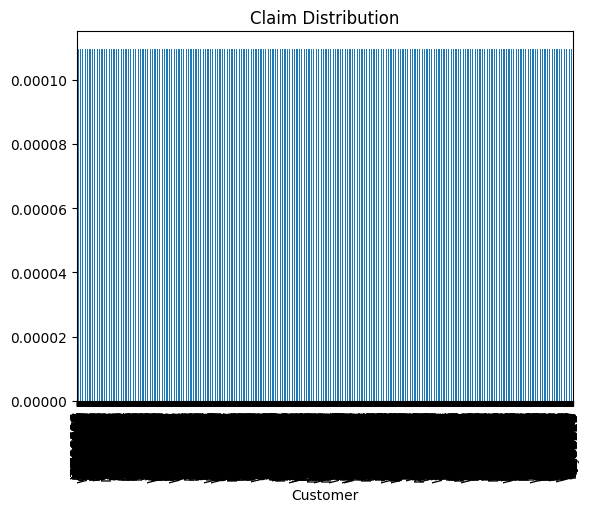

In [6]:
print(df.columns)
# Assuming the correct column name is 'Claim Status' based on the output of df.columns
df['Customer'].value_counts(normalize=True).plot(kind='bar', title='Claim Distribution')

DROPPING IRRELEVANT COLUMNS IF ANY

In [7]:
df = df.drop(['Customer_ID', 'Policy_ID'], axis=1, errors='ignore')

ENCODING CATEGORICAL FEATURES

In [8]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

FILL MISSING VALUES

In [9]:
df = df.fillna(df.median(numeric_only=True))

DEFINE X AND Y

In [10]:
print(df.columns)
X = df.drop('Response', axis=1)
y = df['Response']

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Coverage Index', 'Education', 'Education Index', 'Effective To Date',
       'Employment Status', 'Employment Status Index', 'Gender', 'Income',
       'Location', 'Location Index', 'Marital Status', 'Marital Status Index',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy Type Index', 'Policy',
       'Policy Index', 'Renew Offer Type', 'Sales Channel',
       'Sales Channel Index', 'Total Claim Amount', 'Vehicle Class',
       'Vehicle Class Index', 'Vehicle Size', 'Vehicle Size Index'],
      dtype='object')


TRAIN AND TEST SPLIT

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FEATURE SCALING

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EXPLORATORY DATA ANALYSIS(EDA)

CORRELATION HEATMAP

Text(0.5, 1.0, 'Feature Correlation')

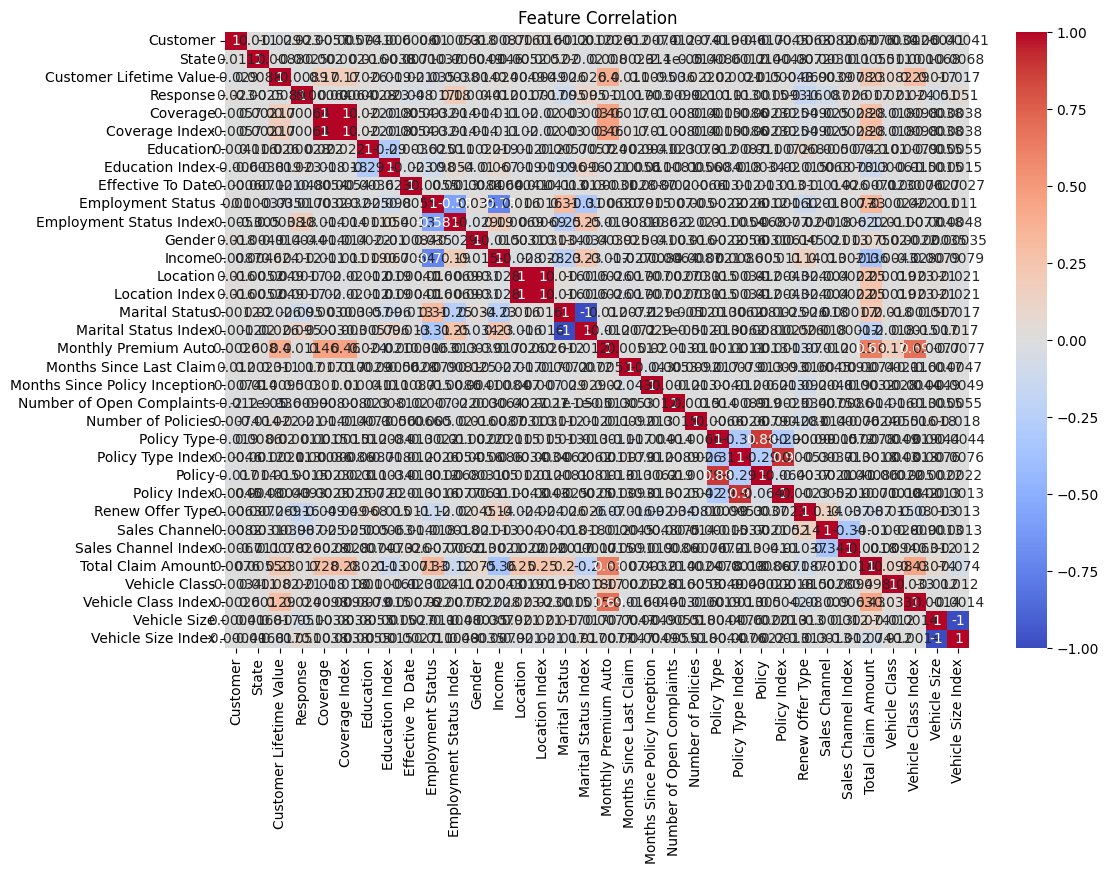

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')

PAIRPLOT OF SELECTED FEATURES

Text(0.5, 1.02, 'Pairplot of Selected Features by Response')

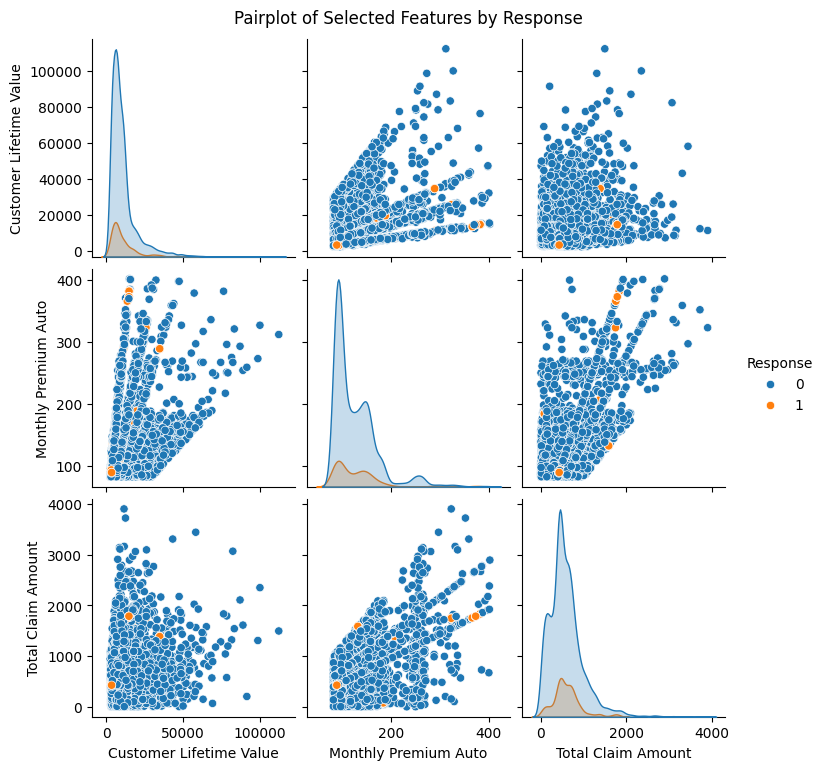

In [14]:
sns.pairplot(df[['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount', 'Response']], hue='Response')
plt.suptitle('Pairplot of Selected Features by Response', y=1.02)

MODEL TRAINING AND EVALUATION

In [15]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Get predicted labels
    acc = accuracy_score(y_test, y_pred)  # Proportion of correct predictions
    roc = roc_auc_score(y_test, y_pred)   # Area under ROC curve for binary classification
    print("Accuracy:", acc)
    print("ROC AUC Score:", roc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc, roc


LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression:")
evaluate_model(lr, X_test, y_test)

Logistic Regression:
Accuracy: 0.8555008210180624
ROC AUC Score: 0.5477204403051382
Confusion Matrix:
 [[1534   12]
 [ 252   29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1546
           1       0.71      0.10      0.18       281

    accuracy                           0.86      1827
   macro avg       0.78      0.55      0.55      1827
weighted avg       0.84      0.86      0.81      1827



(0.8555008210180624, np.float64(0.5477204403051382))

RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("\nRandom Forest:")
evaluate_model(rf, X_test, y_test)


Random Forest:
Accuracy: 0.9989053092501369
ROC AUC Score: 0.999353169469599
Confusion Matrix:
 [[1544    2]
 [   0  281]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1546
           1       0.99      1.00      1.00       281

    accuracy                           1.00      1827
   macro avg       1.00      1.00      1.00      1827
weighted avg       1.00      1.00      1.00      1827



(0.9989053092501369, np.float64(0.999353169469599))

XGBOOST

In [19]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("\nXGBoost:")
evaluate_model(xgb, X_test, y_test)


XGBoost:
Accuracy: 0.9961685823754789
ROC AUC Score: 0.9977360931435965
Confusion Matrix:
 [[1539    7]
 [   0  281]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1546
           1       0.98      1.00      0.99       281

    accuracy                           1.00      1827
   macro avg       0.99      1.00      0.99      1827
weighted avg       1.00      1.00      1.00      1827



(0.9961685823754789, np.float64(0.9977360931435965))

SUPPORT VECTOR MACHINE (SVM)

In [20]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

print("----- SVM Model Evaluation -----")
evaluate_model(svm_model, X_test, y_test)

----- SVM Model Evaluation -----
Accuracy: 0.8790366721401204
ROC AUC Score: 0.6169531749941303
Confusion Matrix:
 [[1539    7]
 [ 214   67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      1546
           1       0.91      0.24      0.38       281

    accuracy                           0.88      1827
   macro avg       0.89      0.62      0.66      1827
weighted avg       0.88      0.88      0.85      1827



(0.8790366721401204, np.float64(0.6169531749941303))

MULTI-LAYER PERCEPTRON (MLP)

In [21]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

print("----- MLP Model Evaluation -----")
evaluate_model(mlp_model, X_test, y_test)

----- MLP Model Evaluation -----
Accuracy: 0.9797482211275315
ROC AUC Score: 0.985121746856772
Confusion Matrix:
 [[1511   35]
 [   2  279]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1546
           1       0.89      0.99      0.94       281

    accuracy                           0.98      1827
   macro avg       0.94      0.99      0.96      1827
weighted avg       0.98      0.98      0.98      1827



(0.9797482211275315, np.float64(0.985121746856772))

VISUALIZE ROC CURVE (ONLY FOR SVM AND MLP MODEL)

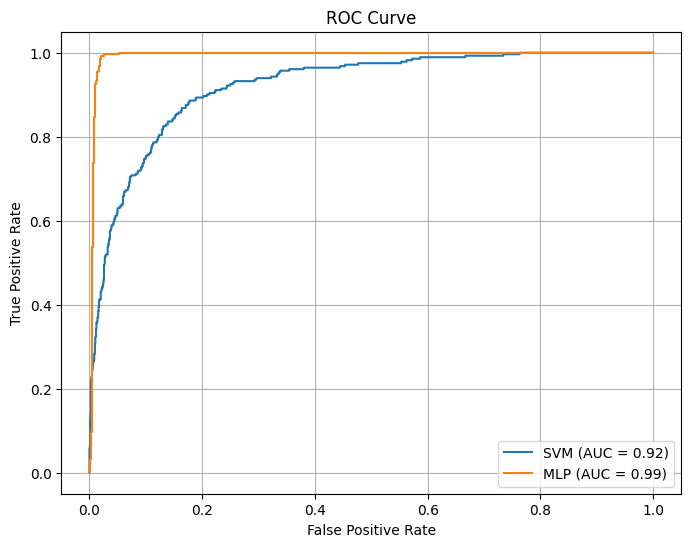

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, label="Model"):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(8,6))
plot_roc_curve(svm_model, X_test, y_test, label="SVM")
plot_roc_curve(mlp_model, X_test, y_test, label="MLP")
plt.show()


HYPERPARAMETER TUNING

In [ ]:
params = {
'n_estimators': [50, 100, 150],
'max_depth': [4, 6, 8],
'min_samples_split': [2, 5],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Tuned RF Accuracy:")
evaluate_model(grid.best_estimator_, X_test, y_test)

Best Parameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RF Accuracy:
Accuracy: 0.8779419813902573
ROC AUC Score: 0.6061147353058979
Confusion Matrix:
 [[1544    2]
 [ 221   60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1546
           1       0.97      0.21      0.35       281

    accuracy                           0.88      1827
   macro avg       0.92      0.61      0.64      1827
weighted avg       0.89      0.88      0.84      1827



(0.8779419813902573, np.float64(0.6061147353058979))

FEATURE IMPORTANCE

Text(0.5, 1.0, 'Top 10 Important Features')

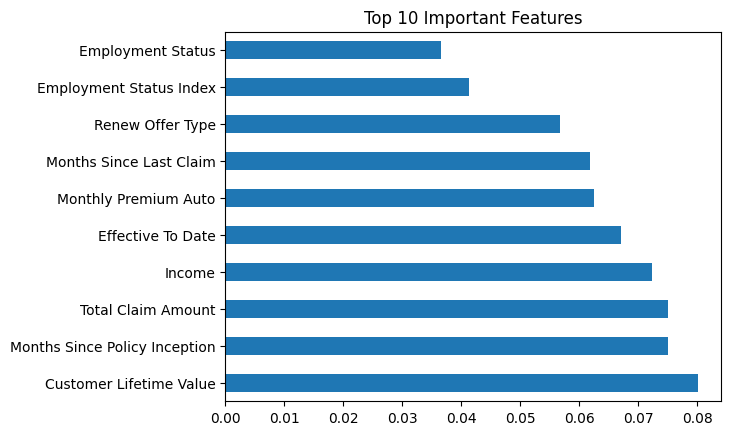

In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=df.drop('Response', axis=1).columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")

ROC CURVE

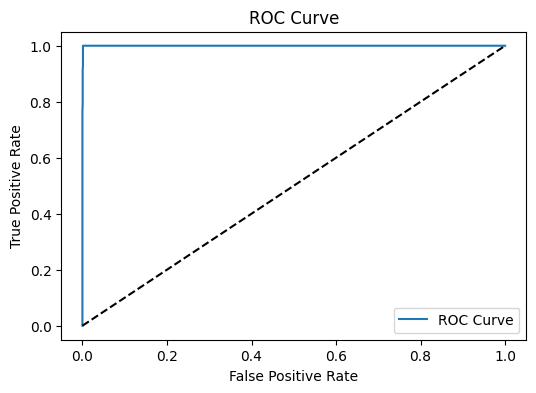

In [ ]:
def plot_roc(model, X_test, y_test):
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc(rf, X_test, y_test)

Q AND A

1. Which factors are most associated with customers filing a claim?

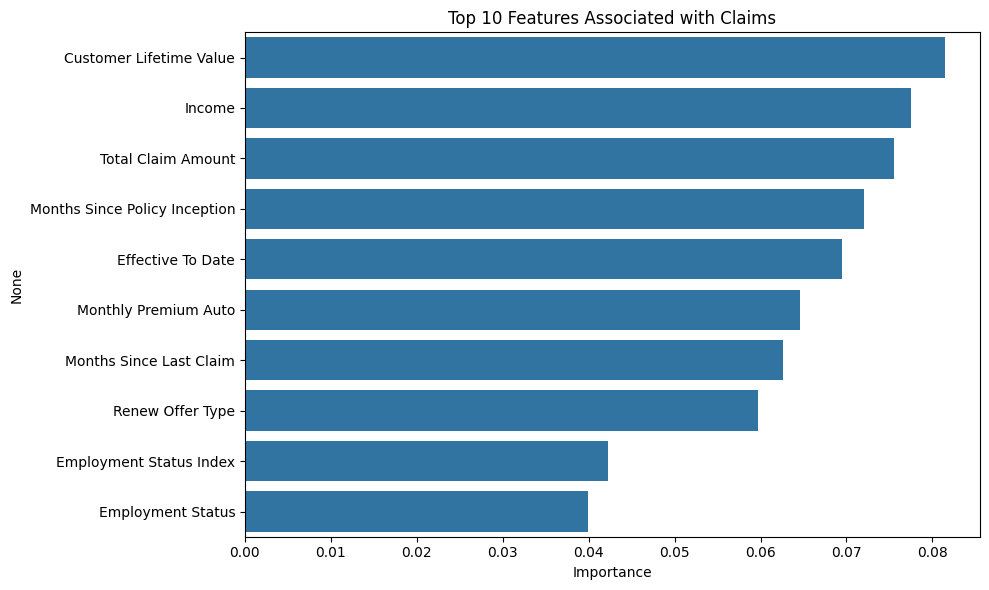

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include="object"):
    if col != "Customer":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Features and target
X = df_encoded.drop(columns=["Customer", "Response"])
y = df_encoded["Response"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Features Associated with Claims")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

2. Is there a pattern in claims based on customer age?

In [ ]:
# Claim rate by Employment Status
print(df.groupby("Employment Status")["Response"].mean())

# Claim rate by Education
print(df.groupby("Education")["Response"].mean())

Employment Status
0    0.177778
1    0.132678
2    0.180556
3    0.723404
4    0.085455
Name: Response, dtype: float64
Education
0    0.137555
1    0.152182
2    0.175439
3    0.130435
4    0.161943
Name: Response, dtype: float64


3. Do customers with previous vehicle damage reports have higher claim rates?

In [ ]:
# Average claim rate by number of complaints
print(df.groupby("Number of Open Complaints")["Response"].mean())

# Count of customers in each complaint group
print(df["Number of Open Complaints"].value_counts().sort_index())

Number of Open Complaints
0    0.146442
1    0.136499
2    0.064171
3    0.184932
4    0.161074
5    0.107143
Name: Response, dtype: float64
Number of Open Complaints
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: count, dtype: int64


4. What is the impact of annual premium amount on claim likelihood?

Premium Bin
(983.999, 1080.0]    0.159763
(1080.0, 1188.0]     0.117368
(1188.0, 1524.0]     0.119867
(1524.0, 1836.0]     0.170865
(1836.0, 4824.0]     0.144054
Name: Response, dtype: float64


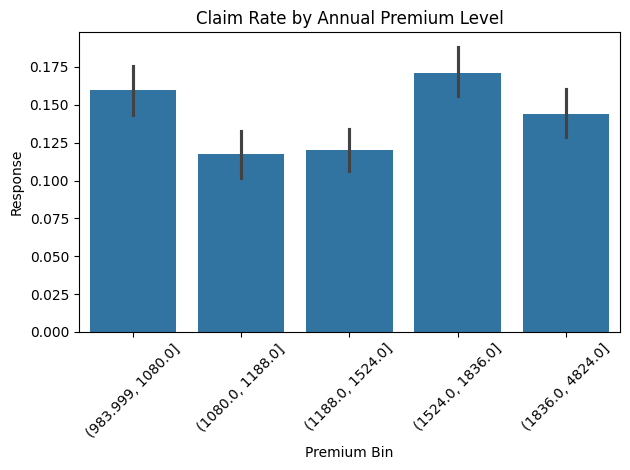

In [ ]:
df["Annual Premium"] = df["Monthly Premium Auto"] * 12

# Bin the premium for easier grouping
df["Premium Bin"] = pd.qcut(df["Annual Premium"], 5)

# Claim rate per premium bin
print(df.groupby("Premium Bin")["Response"].mean())

# Plot
sns.barplot(x="Premium Bin", y="Response", data=df)
plt.xticks(rotation=45)
plt.title("Claim Rate by Annual Premium Level")
plt.tight_layout()
plt.show()

5.  Can we use a clustering algorithm to segment customers into risk profiles?

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[["Customer Lifetime Value", "Income", "Monthly Premium Auto", "Number of Open Complaints", "Response"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Risk Cluster"] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
print(df.groupby("Risk Cluster")[["Response", "Income", "Monthly Premium Auto"]].mean())


              Response        Income  Monthly Premium Auto
Risk Cluster                                              
0             0.136481  92686.082062            115.408293
1             0.155877  20242.806644            115.875426
2             0.105699  49109.373057            212.218653


              Claim        Income  Monthly Premium Auto
Risk Cluster                                           
0               NaN  51989.142857            121.590476
1               NaN  50370.065023            114.275796
2               NaN  52471.211122            205.457116


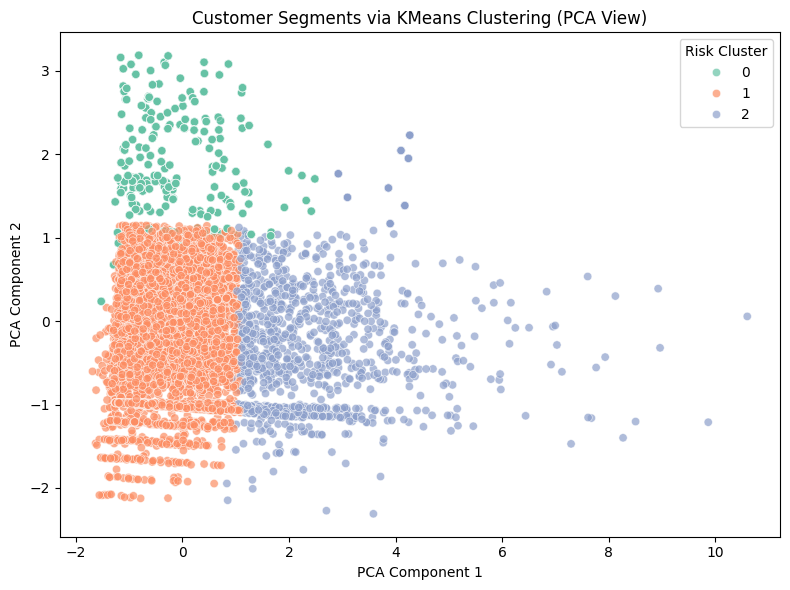

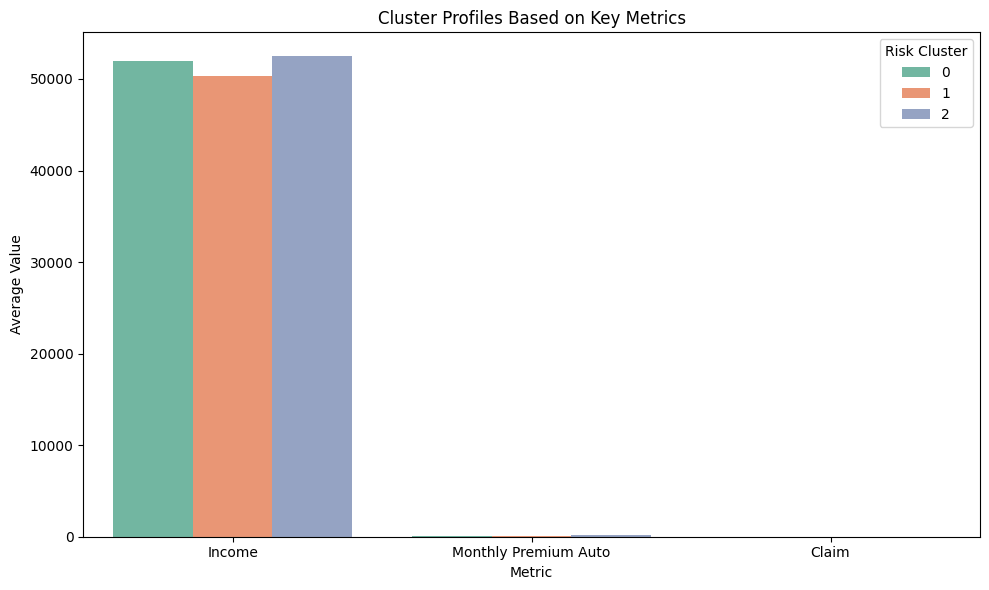

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Encode 'Response' column to numeric for clustering
df_cluster = df.copy()
df_cluster["Claim"] = df_cluster["Response"].map({"Yes": 1, "No": 0})

# Select relevant numeric features for clustering
features = df_cluster[[
    "Customer Lifetime Value",
    "Income",
    "Monthly Premium Auto",
    "Number of Open Complaints",
    "Response"
]]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster["Risk Cluster"] = kmeans.fit_predict(X_scaled)

# Summary statistics for each cluster
summary = df_cluster.groupby("Risk Cluster")[["Claim", "Income", "Monthly Premium Auto"]].mean()
print(summary)

# --- Visualization 1: PCA Scatter Plot ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_cluster["PCA1"] = X_pca[:, 0]
df_cluster["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x="PCA1", y="PCA2", hue="Risk Cluster", palette="Set2", alpha=0.7)
plt.title("Customer Segments via KMeans Clustering (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Risk Cluster")
plt.tight_layout()
plt.show()

# --- Visualization 2: Average Metrics by Cluster ---
cluster_means = df_cluster.groupby("Risk Cluster")[["Income", "Monthly Premium Auto", "Claim"]].mean().reset_index()
cluster_means_melted = cluster_means.melt(id_vars="Risk Cluster", var_name="Metric", value_name="Average Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_melted, x="Metric", y="Average Value", hue="Risk Cluster", palette="Set2")
plt.title("Cluster Profiles Based on Key Metrics")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()


6. How does education level relate to claim rates?

Education
0    0.137555
1    0.152182
2    0.175439
3    0.130435
4    0.161943
Name: Response, dtype: float64


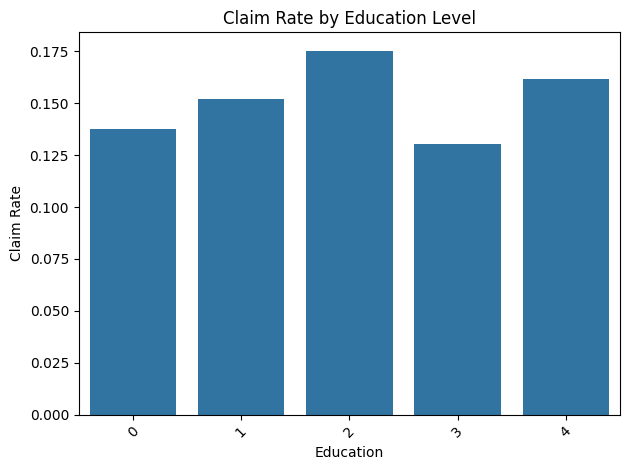

In [ ]:
# Claim rate by education level
edu_claims = df.groupby("Education")["Response"].mean()
print(edu_claims)

# Plot
sns.barplot(x=edu_claims.index, y=edu_claims.values)
plt.xticks(rotation=45)
plt.ylabel("Claim Rate")
plt.title("Claim Rate by Education Level")
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data (assuming df is your dataframe)
df = df.dropna()  # Basic handling; you can customize

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop("Response", axis=1)  # Replace with your actual target
y = df["Response"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1546
           1       0.99      1.00      1.00       281

    accuracy                           1.00      1827
   macro avg       1.00      1.00      1.00      1827
weighted avg       1.00      1.00      1.00      1827



In [28]:
import joblib

joblib.dump(model, "insurance_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [31]:
%pip install streamlit

In [32]:
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load("insurance_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("Auto Insurance Claim Prediction")

# Sample input fields (customize as per your features)
age = st.number_input("Driver Age", 18, 100, 30)
vehicle_age = st.number_input("Vehicle Age (Years)", 0, 20, 5)
accidents = st.number_input("Number of Past Accidents", 0, 10, 0)
# Add more fields matching your model's features

if st.button("Predict"):
    input_data = np.array([[age, vehicle_age, accidents]])  # Adjust this line
    input_scaled = scaler.transform(input_data)
    pred_prob = model.predict_proba(input_scaled)[0][1]
    st.success(f"Probability of Claim: {pred_prob*100:.2f}%")


2025-06-11 12:51:33.403 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:51:33.844 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-11 12:51:33.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:51:33.848 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:51:33.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:51:33.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:51:33.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:51:33.859 Session state does not 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Optional: evaluate
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model, "insurance_model.pkl")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1546
           1       0.99      1.00      1.00       281

    accuracy                           1.00      1827
   macro avg       1.00      1.00      1.00      1827
weighted avg       1.00      1.00      1.00      1827



['insurance_model.pkl']

In [34]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [37]:
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load("insurance_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("🚗 Auto Insurance Claim Prediction")

# Input fields - Updated to include placeholders for all 33 features
# You will need to add appropriate streamlit input widgets for each of these features
# based on the data used to train your model.
age = st.slider("Age", 18, 100, 30)
driving_license = st.selectbox("Driving License", [0, 1])
previously_insured = st.selectbox("Previously Insured", [0, 1])
annual_premium = st.number_input("Annual Premium", 1000, 100000, 30000)
policy_sales_channel = st.number_input("Policy Sales Channel", 0, 200, 26)
vintage = st.slider("Vintage (days with company)", 0, 300, 150)
vehicle_damage_yes = st.selectbox("Vehicle Damaged Before?", ["No", "Yes"]) # This is one-hot encoded
gender_male = st.selectbox("Gender", ["Male", "Female"]) # This is one-hot encoded
vehicle_age_1_2_year = st.selectbox("Vehicle Age 1-2 Year", ["No", "Yes"]) # This is one-hot encoded
vehicle_age_gt_2_years = st.selectbox("Vehicle Age > 2 Years", ["No", "Yes"]) # This is one-hot encoded

# Placeholders for the remaining 23 features - REPLACE WITH ACTUAL INPUT WIDGETS
# Refer to your training data (X variable) to determine the correct features and their types
feature_placeholder_1 = 0
feature_placeholder_2 = 0
feature_placeholder_3 = 0
feature_placeholder_4 = 0
feature_placeholder_5 = 0
feature_placeholder_6 = 0
feature_placeholder_7 = 0
feature_placeholder_8 = 0
feature_placeholder_9 = 0
feature_placeholder_10 = 0
feature_placeholder_11 = 0
feature_placeholder_12 = 0
feature_placeholder_13 = 0
feature_placeholder_14 = 0
feature_placeholder_15 = 0
feature_placeholder_16 = 0
feature_placeholder_17 = 0
feature_placeholder_18 = 0
feature_placeholder_19 = 0
feature_placeholder_20 = 0
feature_placeholder_21 = 0
feature_placeholder_22 = 0
feature_placeholder_23 = 0


# Process input (one-hot encoding for categorical features)
vehicle_damage_yes = 1 if vehicle_damage_yes == "Yes" else 0
gender_male = 1 if gender_male == "Male" else 0
vehicle_age_1_2_year = 1 if vehicle_age_1_2_year == "Yes" else 0
vehicle_age_gt_2_years = 1 if vehicle_age_gt_2_years == "Yes" else 0


# Construct the input array with all 33 features
# ENSURE THE ORDER OF FEATURES MATCHES THE TRAINING DATA
input_data = np.array([[age, driving_license, previously_insured, annual_premium,
                        policy_sales_channel, vintage, vehicle_damage_yes,
                        gender_male, vehicle_age_1_2_year, vehicle_age_gt_2_years,
                        feature_placeholder_1, feature_placeholder_2, feature_placeholder_3,
                        feature_placeholder_4, feature_placeholder_5, feature_placeholder_6,
                        feature_placeholder_7, feature_placeholder_8, feature_placeholder_9,
                        feature_placeholder_10, feature_placeholder_11, feature_placeholder_12,
                        feature_placeholder_13, feature_placeholder_14, feature_placeholder_15,
                        feature_placeholder_16, feature_placeholder_17, feature_placeholder_18,
                        feature_placeholder_19, feature_placeholder_20, feature_placeholder_21,
                        feature_placeholder_22, feature_placeholder_23]])


# Scale input
scaled_input = scaler.transform(input_data)

# Predict
if st.button("Predict"):
    pred_prob = model.predict_proba(scaled_input)[0][1]
    st.success(f"Claim Probability: {pred_prob*100:.2f}%")

2025-06-11 13:03:45.087 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 13:03:45.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 13:03:45.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 13:03:45.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 13:03:45.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 13:03:45.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 13:03:45.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 13:03:45.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar